### finding the crop width and height

In [ ]:
import cv2

# Load the video and get a single frame
video_path = './datasets/mobile-videos/muted_1.mp4'
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

if ret:
    # Interactive ROI selection
    roi = cv2.selectROI("Select ROI", frame, fromCenter=False, showCrosshair=True)
    cv2.destroyAllWindows()
    
    # Extract ROI values
    CROP_X, CROP_Y, CROP_WIDTH, CROP_HEIGHT = int(roi[0]), int(roi[1]), int(roi[2]), int(roi[3])
    print(f"Selected ROI - X: {CROP_X}, Y: {CROP_Y}, Width: {CROP_WIDTH}, Height: {CROP_HEIGHT}")
else:
    print("Error: Cannot read frame.")


Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


2024-12-21 10:28:01.770 python[26796:7835743] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-21 10:28:01.770 python[26796:7835743] +[IMKInputSession subclass]: chose IMKInputSession_Modern


**using the above code, the region of interest was identified and it was noted down below.
based on that the videos were cropped using the code and saved inside the datasets/mobile-videos with the prefix "cropped"**

In [6]:
CROP_X = 357
CROP_Y = 256
CROP_WIDTH = 574  
CROP_HEIGHT = 1002 

### cropping

In [ ]:
# import cv2
# import os
# import numpy as np
# import matplotlib.pyplot as plt

# # Define video paths
# video_dir = './datasets/mobile-videos'
# videos = ["muted_1.mp4", "muted_2.mp4", "muted_3.mp4"]

# # Define output directory
# output_dir = './datasets/mobile-videos'
# os.makedirs(output_dir, exist_ok=True)

# # Define a cropping region of interest (ROI)
# # defined in above cell

# # Helper function to visualize a frame
# def display_frame(frame, title="Frame"):
#     plt.figure(figsize=(10, 6))
#     plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
#     plt.title(title)
#     plt.axis("off")
#     plt.show()

# # Process each video
# for video_name in videos:
#     video_path = os.path.join(video_dir, video_name)
#     cap = cv2.VideoCapture(video_path)
    
#     if not cap.isOpened():
#         print(f"Error: Cannot open {video_name}")
#         continue

#     frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     fps = int(cap.get(cv2.CAP_PROP_FPS))
#     num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     print(f"Processing {video_name} - {frame_width}x{frame_height}, {fps} FPS, {num_frames} frames")

#     # Output video writer
#     output_video_path = os.path.join(output_dir, f"cropped_{video_name}")
#     out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps,
#                           (CROP_WIDTH, CROP_HEIGHT))

#     frame_idx = 0
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Crop the frame
#         cropped_frame = frame[CROP_Y:CROP_Y + CROP_HEIGHT, CROP_X:CROP_X + CROP_WIDTH]
#         processed_frame = cropped_frame

#         # Write the processed frame
#         out.write(processed_frame)


#         frame_idx += 1

#     cap.release()
#     out.release()
#     print(f"Finished processing {video_name}. Saved to {output_video_path}")


### pre processing

#### helper functions

In [35]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Helper function to visualize a frame
def display_frame(frame, title="Frame"):
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()
    
def print_video_details(cap,video_name):
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Processing {video_name} - {frame_width}x{frame_height}, {fps} FPS, {num_frames} frames")
    return fps

#### pre processing functions

In [47]:
# Define noise reduction parameters
GAUSSIAN_KERNEL_SIZE = (5, 5)  # Size for Gaussian blur
MEDIAN_KERNEL_SIZE = 5  # Kernel size for Median blur
BILATERAL_FILTER_PARAMS = (9, 75, 75)  # Diameter, SigmaColor, SigmaSpace

# Morphological kernel
MORPH_KERNEL = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

def noice_reduction(frame):
        # Apply Gaussian blur
        processed_frame = cv2.GaussianBlur(frame, GAUSSIAN_KERNEL_SIZE, 0)

        # Apply Median blur
        processed_frame = cv2.medianBlur(processed_frame, MEDIAN_KERNEL_SIZE)

        # Apply Bilateral Filtering
        processed_frame = cv2.bilateralFilter(processed_frame, *BILATERAL_FILTER_PARAMS)
        
        return processed_frame


def background_sub(frame):
        # Background subtraction
        bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)
        fg_mask = bg_subtractor.apply(frame)

        # Morphological operations to refine the mask
        cleaned_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, MORPH_KERNEL)

        # Convert mask to 3-channel for visualization
        mask_colored = cv2.cvtColor(cleaned_mask, cv2.COLOR_GRAY2BGR)
        processed_frame = cv2.addWeighted(frame, 0.7, mask_colored, 0.3, 0)
        return processed_frame

#### script run for pre processing

Processing cropped_muted_1.mp4 - 574x1002, 29 FPS, 3324 frames


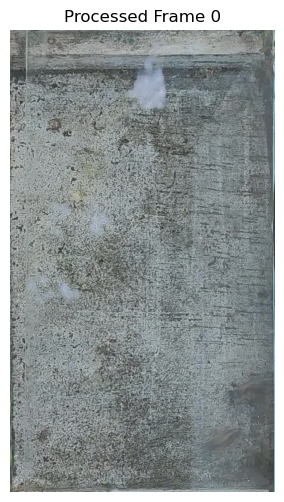

Finished processing cropped_muted_1.mp4. Saved to ./datasets/pre-processed-mobile-videos/1.1pre-processed_cropped_muted_1.mp4


In [49]:
# Define video paths
video_dir = './datasets/mobile-videos'
# videos = ["cropped_muted_1.mp4", "cropped_muted_2.mp4", "cropped_muted_3.mp4"]
videos = ["cropped_muted_1.mp4"]

# Define output directory
output_dir = './datasets/pre-processed-mobile-videos'
os.makedirs(output_dir, exist_ok=True)


# Process each video
for video_name in videos:
    video_path = os.path.join(video_dir, video_name)
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print(f"Error: Cannot open {video_name}")
        continue

    fps = print_video_details(cap,video_name)

    # Output video writer
    output_video_path = os.path.join(output_dir, f"pre-processed_{video_name}")
    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps,
                          (CROP_WIDTH, CROP_HEIGHT))

    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # single function to pre process
        # processed_frame = noice_reduction(frame) # noice reduction is not working
        processed_frame = background_sub(frame)

        # Write the processed frame
        out.write(processed_frame)

        # Display every 1000th frame
        if frame_idx % 10000 == 0:
            display_frame(processed_frame, title=f"Processed Frame {frame_idx}")

        frame_idx += 1

    cap.release()
    out.release()
    print(f"Finished processing {video_name}. Saved to {output_video_path}")
